<a href="https://colab.research.google.com/github/Harish-cathrish/Demo-project/blob/main/True_and_Fake_News_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Title: True and Fake News Prediction**

**Project Overview**:  

This project aims to develop a machine learning model capable of distinguishing between true and fake news articles. By analyzing linguistic features and patterns within news content, the model will classify articles based on their likelihood of being true or fake. The project involves collecting and preprocessing data from credible and fake news sources, engineering relevant features, and testing various machine learning algorithms like Logistic Regression, SVM, and deep learning models.

The model's performance will be evaluated using accuracy, precision, recall, and other metrics, with the goal of creating a reliable tool for real-time news verification. The outcome could support journalists, social media platforms, and the general public in identifying misleading information and promoting informed decision-making.

**Tools and Technologies**:

Programming Languages: Python, R Libraries and Frameworks: Pandas, NumPy, Scikit-Learn, TensorFlow/Keras, StatsModels, Matplotlib, Seaborn Data Visualization: Tableau, Power BI, or custom web-based dashboards Deployment: Flask/Django for web deployment or integration with existing BI tools

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import numpy as np
import pandas as pd
#importing the required libraries for the Analysis of the project.

In [3]:
Test=pd.read_csv('/content/drive/MyDrive/Datasets/Fake prediction /test.csv')
##import necessary libraries and load dataset

In [4]:
Train=pd.read_csv('/content/drive/MyDrive/Datasets/Fake prediction /train.csv')
##import necessary libraries and load dataset

**Data Structure and Content**

In [5]:
Train.shape
# shape function Helps us identify how many rows and columns we have acoording to our data set

(20800, 5)

In [6]:
Test.shape
# shape function Helps us identify how many rows and columns we have acoording to our data set.

(5200, 4)

In [7]:
Train.info()
#display the information about the datasets

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20800 entries, 0 to 20799
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      20800 non-null  int64 
 1   title   20242 non-null  object
 2   author  18843 non-null  object
 3   text    20761 non-null  object
 4   label   20800 non-null  int64 
dtypes: int64(2), object(3)
memory usage: 812.6+ KB


In [8]:
Test.info()
# display coloumn names

NameError: name 'test' is not defined

In [ ]:
Train.isnull().sum()
#display number of missing values of each colum

In [9]:
Test.isnull().sum()
#display number of missing values of each column

,0
id,0
title,122
author,503
text,7


In [10]:
Train.describe()
#display descriptive statistics

,id,label
count,20800.000000,20800.000000
mean,10399.500000,0.500625
std,6004.587135,0.500012
min,0.000000,0.000000
25%,5199.750000,0.000000
50%,10399.500000,1.000000
75%,15599.250000,1.000000
max,20799.000000,1.000000


In [12]:
Test.describe()
#display discriptive statistics

,id
count,5200.000000
mean,23399.500000
std,1501.255031
min,20800.000000
25%,22099.750000
50%,23399.500000
75%,24699.250000
max,25999.000000


In [16]:
Train.head()
#display first few rows of the datasets

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [17]:
Test.head()
#display first few rows of the datasets

,id,title,author,text
0,20800,"Specter of Trump Loosens Tongues, if Not Purse...",David Streitfeld,"PALO ALTO, Calif. — After years of scorning..."
1,20801,Russian warships ready to strike terrorists ne...,NaN,Russian warships ready to strike terrorists ne...
2,20802,#NoDAPL: Native American Leaders Vow to Stay A...,Common Dreams,Videos #NoDAPL: Native American Leaders Vow to...
3,20803,"Tim Tebow Will Attempt Another Comeback, This ...",Daniel Victor,"If at first you don’t succeed, try a different..."
4,20804,Keiser Report: Meme Wars (E995),Truth Broadcast Network,42 mins ago 1 Views 0 Comments 0 Likes 'For th...


# **Data Preprocessing**

1.Removing the null values

In [18]:
Train=Train.fillna(' ')
#Replace the missing values in the Train dataset with a space (' ')

In [19]:
Test=Test.fillna(' ')
#Replace the missing values in the Test dataset with a space (' ')

In [20]:
Train.isnull().sum()
#display number of missing values of each column

,0
id,0
title,0
author,0
text,0
label,0


In [21]:
Test.isnull().sum()
#display number of missing values of each column

,0
id,0
title,0
author,0
text,0


In [22]:
Test.info()
#display information about the datasets

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5200 entries, 0 to 5199
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      5200 non-null   int64 
 1   title   5200 non-null   object
 2   author  5200 non-null   object
 3   text    5200 non-null   object
dtypes: int64(1), object(3)
memory usage: 162.6+ KB


In [23]:
Test.describe()
#display descriptive statistic

,id
count,5200.000000
mean,23399.500000
std,1501.255031
min,20800.000000
25%,22099.750000
50%,23399.500000
75%,24699.250000
max,25999.000000


In [24]:
Train.head()
#display first few rows of the datasets

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [25]:
Test.head()
#display first few rows of the datasets

,id,title,author,text
0,20800,"Specter of Trump Loosens Tongues, if Not Purse...",David Streitfeld,"PALO ALTO, Calif. — After years of scorning..."
1,20801,Russian warships ready to strike terrorists ne...,,Russian warships ready to strike terrorists ne...
2,20802,#NoDAPL: Native American Leaders Vow to Stay A...,Common Dreams,Videos #NoDAPL: Native American Leaders Vow to...
3,20803,"Tim Tebow Will Attempt Another Comeback, This ...",Daniel Victor,"If at first you don’t succeed, try a different..."
4,20804,Keiser Report: Meme Wars (E995),Truth Broadcast Network,42 mins ago 1 Views 0 Comments 0 Likes 'For th...


In [26]:
Train['subject']=Train['author'] + ' ' + Train['title']
# Create a new column 'subject' by concatenating the 'author' and 'title' columns with a space in between

# **Tokenization**

In [27]:
import nltk
nltk.download('punkt')
# Download the Punkt tokenizer models for tokenization

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [28]:
from nltk.tokenize import word_tokenize
Train['tokens']=Train['subject'].apply(word_tokenize)
# Tokenize the 'subject' column and create a new column 'tokens'

In [29]:
Train.head()
#display first few rows of the datasets

,id,title,author,text,label,subject,tokens
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1,Darrell Lucus House Dem Aide: We Didn’t Even S...,"[Darrell, Lucus, House, Dem, Aide, :, We, Didn..."
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0,"Daniel J. Flynn FLYNN: Hillary Clinton, Big Wo...","[Daniel, J., Flynn, FLYNN, :, Hillary, Clinton..."
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1,Consortiumnews.com Why the Truth Might Get You...,"[Consortiumnews.com, Why, the, Truth, Might, G..."
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1,Jessica Purkiss 15 Civilians Killed In Single ...,"[Jessica, Purkiss, 15, Civilians, Killed, In, ..."
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1,Howard Portnoy Iranian woman jailed for fictio...,"[Howard, Portnoy, Iranian, woman, jailed, for,..."


3.Lowercasing the text

In [30]:
Train['subject']=Train['subject'].str.lower()
# Convert all text in the 'subject' column to lowercase

In [31]:
Train.head()
#display first few rows of the datasets

,id,title,author,text,label,subject,tokens
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1,darrell lucus house dem aide: we didn’t even s...,"[Darrell, Lucus, House, Dem, Aide, :, We, Didn..."
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0,"daniel j. flynn flynn: hillary clinton, big wo...","[Daniel, J., Flynn, FLYNN, :, Hillary, Clinton..."
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1,consortiumnews.com why the truth might get you...,"[Consortiumnews.com, Why, the, Truth, Might, G..."
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1,jessica purkiss 15 civilians killed in single ...,"[Jessica, Purkiss, 15, Civilians, Killed, In, ..."
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1,howard portnoy iranian woman jailed for fictio...,"[Howard, Portnoy, Iranian, woman, jailed, for,..."


4.Removal of punctuation

In [32]:
Train['subject']=Train['subject'].str.replace('[^\w\s]',' ')
# Remove all punctuation marks from the 'subject' column

In [33]:
Train.head()
#display first few rows of the datasets

,id,title,author,text,label,subject,tokens
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1,darrell lucus house dem aide: we didn’t even s...,"[Darrell, Lucus, House, Dem, Aide, :, We, Didn..."
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0,"daniel j. flynn flynn: hillary clinton, big wo...","[Daniel, J., Flynn, FLYNN, :, Hillary, Clinton..."
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1,consortiumnews.com why the truth might get you...,"[Consortiumnews.com, Why, the, Truth, Might, G..."
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1,jessica purkiss 15 civilians killed in single ...,"[Jessica, Purkiss, 15, Civilians, Killed, In, ..."
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1,howard portnoy iranian woman jailed for fictio...,"[Howard, Portnoy, Iranian, woman, jailed, for,..."


5.Removal of stop words

In [34]:
nltk.download('stopwords')
# Download the stopwords corpus for removing stop words

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [35]:
sw=set(nltk.corpus.stopwords.words('english'))
print(sw)
# Create a set of English stopwords and print it

{"mustn't", 'can', "hadn't", 'nor', 'in', 'between', 'me', 'above', 'out', 'had', 'you', 'so', 'll', 'themselves', 'how', 'she', 'it', 'before', 'aren', 'after', "doesn't", 'her', 'don', 'few', 'some', 'should', "won't", "didn't", 'your', 'yours', 'such', 'off', 'its', "isn't", 'has', 'here', 'my', "you'll", 's', 'd', "wasn't", "don't", 'our', 'to', 'other', 'more', 'most', "you'd", "you've", 'do', 'both', 'yourselves', 'over', "it's", 'haven', 'again', 'didn', 'these', 'from', "should've", "haven't", 'hasn', "weren't", 'but', 'yourself', 'shan', 'was', 'is', 'being', 'for', 'are', 'needn', 've', 'each', 'their', 'the', 'why', 'as', 'on', 'hadn', 'couldn', 'up', 'his', 'of', 're', 'only', 'doesn', 'did', 'by', 'own', "wouldn't", 'until', 'm', 'while', 'who', 'were', 'any', 'through', 'with', 'too', 'an', 'isn', 'they', 'we', 'whom', "mightn't", 'ourselves', 'does', 'wouldn', 'a', "shan't", 'very', "she's", 'once', 'ma', 'or', 't', 'himself', 'wasn', 'about', 'during', 'same', 'ain', 'n

In [36]:
Train['subject'] = Train['subject'].apply(lambda x: ' '.join([word for word in x.split() if word not in sw]))
# Here we try to remove the stopwords by adding only the words which are not in the SW stopword set.

In [37]:
Train.head()
#display first few rows of the datasets

,id,title,author,text,label,subject,tokens
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1,darrell lucus house dem aide: didn’t even see ...,"[Darrell, Lucus, House, Dem, Aide, :, We, Didn..."
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0,"daniel j. flynn flynn: hillary clinton, big wo...","[Daniel, J., Flynn, FLYNN, :, Hillary, Clinton..."
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1,consortiumnews.com truth might get fired,"[Consortiumnews.com, Why, the, Truth, Might, G..."
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1,jessica purkiss 15 civilians killed single us ...,"[Jessica, Purkiss, 15, Civilians, Killed, In, ..."
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1,howard portnoy iranian woman jailed fictional ...,"[Howard, Portnoy, Iranian, woman, jailed, for,..."


6.stemming or lammatization

In [38]:
from nltk.stem import PorterStemmer
# Import the PorterStemmer class for stemming

In [39]:
Stemmer=PorterStemmer()
#To Apply Stemming or Lemmatization :        stemmer = PorterStemmer()
Train['subject'] = Train['subject'].apply(lambda x: ' '.join([Stemmer.stem(word) for word in x.split()]))
# Stemming is the simple process of reducing the words to their root forms

In [40]:
Train.head()
#display first few rows of the datasets

,id,title,author,text,label,subject,tokens
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1,darrel lucu hous dem aide: didn’t even see com...,"[Darrell, Lucus, House, Dem, Aide, :, We, Didn..."
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0,"daniel j. flynn flynn: hillari clinton, big wo...","[Daniel, J., Flynn, FLYNN, :, Hillary, Clinton..."
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1,consortiumnews.com truth might get fire,"[Consortiumnews.com, Why, the, Truth, Might, G..."
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1,jessica purkiss 15 civilian kill singl us airs...,"[Jessica, Purkiss, 15, Civilians, Killed, In, ..."
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1,howard portnoy iranian woman jail fiction unpu...,"[Howard, Portnoy, Iranian, woman, jailed, for,..."


# **Vectorisation**

In [41]:
x=Train['subject']
y=Train['label']
# Assign the 'subject' column to variable x (features) and the 'label' column to variable y (target)

In [42]:
from sklearn.feature_extraction.text import TfidfVectorizer
# Import the TfidfVectorizer class for vectorizing text data

In [43]:
Vt=TfidfVectorizer()
Vt.fit(x)
# Fit the TfidfVectorizer on the 'subject' column of the Train dataset

TfidfVectorizer()

In [44]:
x.head()
#display first few rows of the datasets

,subject
0,darrel lucu hous dem aide: didn’t even see com...
1,"daniel j. flynn flynn: hillari clinton, big wo..."
2,consortiumnews.com truth might get fire
3,jessica purkiss 15 civilian kill singl us airs...
4,howard portnoy iranian woman jail fiction unpu...


In [45]:
x=Vt.transform(x)
# Transform the 'subject' column of the Train dataset using the fitted TfidfVectorizer

In [46]:
print(x)
# Print the transformed data

  (0, 19097)	0.27315635150958634
  (0, 16473)	0.23676064517956458
  (0, 11072)	0.33384522056560495
  (0, 10747)	0.2682220926318631
  (0, 9692)	0.22757176689298136
  (0, 8832)	0.205341824533184
  (0, 6433)	0.2142258791026174
  (0, 5256)	0.27468869329117757
  (0, 4995)	0.2512923264945339
  (0, 4763)	0.3304457115379666
  (0, 3952)	0.22664699692052692
  (0, 3403)	0.3375689613898566
  (0, 809)	0.3646500188253279
  (1, 20416)	0.29951908908156866
  (1, 8608)	0.19815023888659125
  (1, 7101)	0.711483310803025
  (1, 4728)	0.26268668599849243
  (1, 3778)	0.19062686807106288
  (1, 3100)	0.3870784468942128
  (1, 2713)	0.15460118725006144
  (1, 2258)	0.2928176012009572
  (2, 19015)	0.41491113753784553
  (2, 11878)	0.49151393723208897
  (2, 7650)	0.34605253138342823
  (2, 6968)	0.39293503470255664
  :	:
  (20797, 15142)	0.2718547014681534
  (20797, 14906)	0.24707379158386517
  (20797, 12685)	0.08013411384942215
  (20797, 11844)	0.17405416749037161
  (20797, 11767)	0.2945753459972408
  (20797, 11179)	

In [47]:
# For building the machine learning models
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [48]:
# For evaluating the models using the metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score
from sklearn.model_selection  import cross_val_score as CVS
from sklearn.metrics import classification_report

In [49]:
xTrain,xTest,yTrain,yTest=train_test_split(x,y,test_size=0.2,stratify=y,random_state=42)
# Split the data into training and testing sets

In [50]:
Model=LogisticRegression()
# Create a Logistic Regression model

In [51]:
Model.fit(xTrain,yTrain)
# Fit the Logistic Regression model on the training data

LogisticRegression()

In [52]:
ytrpredict=Model.predict(xTrain)
# Make predictions on the training data using the trained Logistic Regression model

In [53]:
accuracy=accuracy_score(yTrain,ytrpredict)
precision=precision_score(yTrain,ytrpredict)
recall=recall_score(yTrain,ytrpredict)
f1=f1_score(yTrain,ytrpredict)

print('Training Accuracy:',accuracy)
print('Training Precision:',precision)
print('Training Recall:',recall)
print('Training F1 Score:',f1)

Training Accuracy: 0.9878004807692308
Training Precision: 0.9809444904722452
Training Recall: 0.9949579831932773
Training F1 Score: 0.9879015435961619


In [54]:
accuracy =accuracy_score(yTrain,ytrpredict)
precision = precision_score(yTrain, ytrpredict)
recall = recall_score(yTrain, ytrpredict)
f1 = f1_score(yTrain, ytrpredict)

print(' Training Accuracy:', accuracy)
print(' Training Precision:', precision)
print(' Training Recall:', recall)
print('Training F1 Score:',f1)

 Training Accuracy: 0.9878004807692308
 Training Precision: 0.9809444904722452
 Training Recall: 0.9949579831932773
Training F1 Score: 0.9879015435961619


In [55]:
Yttpredict=Model.predict(xTest)
# Make predictions on the testing data using the trained Logistic Regression model

In [56]:
accuracy =accuracy_score(yTest,Yttpredict)
precision = precision_score(yTest, Yttpredict)
recall = recall_score(yTest, Yttpredict)
f1 = f1_score(yTest, Yttpredict)

print(' Testing Accuracy:', accuracy)
print(' Testing Precision:', precision)
print(' Testing Recall:', recall)
print('Testing F1 Score:',f1)

 Testing Accuracy: 0.9754807692307692
 Testing Precision: 0.9609120521172638
 Testing Recall: 0.9913586173787806
Testing F1 Score: 0.975897920604915


In [57]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
# Import necessary libraries for confusion matrix

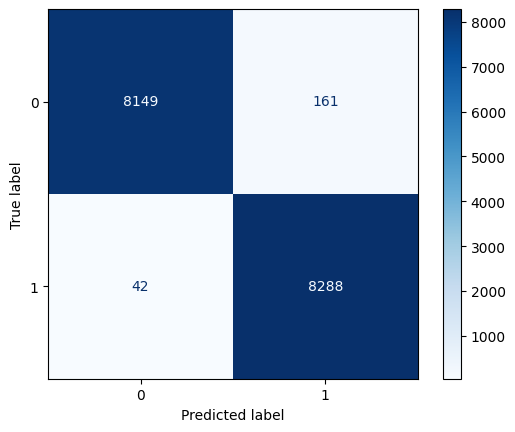

In [58]:
# Generate the confusion matrix
cm = confusion_matrix(yTrain,ytrpredict)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)

plt.show()

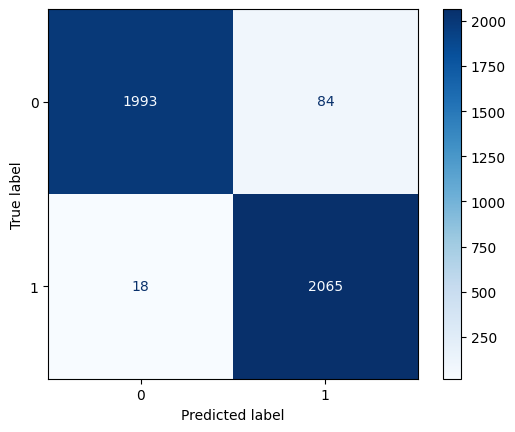

In [59]:
# Generate the confusion matrix
cm = confusion_matrix(yTest,Yttpredict)

# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)

plt.show()


# **Saving the model**

In [60]:
import pickle
# Import the pickle module for serializing and deserializing Python object

**SUMMARY**:

This project focuses on predicting the reliability of news articles by analyzing text features such as word patterns and sentiment using Natural Language Processing NLP. The programs data structure efficiently organizes news articles, storing features like text, labels true/fake, and vectorized content, enabling precise content analysis.

Data preprocessing is a critical phase in this project, involving several steps to prepare the raw data for machine learning. These steps include:

Removing Null Values: Discarding incomplete or missing data to ensure dataset quality.
Tokenization: Splitting text into words or phrases for detailed analysis.
Lower Casing Text: Standardizing text by converting all characters to lowercase.
Removal of Punctuation: Simplifying text by stripping unnecessary punctuation.
Removal of Stop Words: Eliminating common, non-informative words.
Stemming or Lemmatization: Reducing words to their root forms for consistency.
Vectorization: Converting text into numerical data for model input.
These preprocessing steps enhance data quality, enabling accurate true and fake news classification.